# Stock Price Prediction using ANN

## Introduction
This notebook demonstrates the prediction of stock prices using a simple Artificial Neural Network (ANN). We will use historical data to predict future stock prices, focusing on a univariate time series model for simplicity.

## 1. Data Loading
Fetch historical stock data using `pandas_datareader`.

In [15]:
!pip install yfinance==0.2.12

In [16]:
import yfinance as yf

ticker = "AAPL"

df = yf.download("AAPL", period="20y")

df.head()

[*********************100%***********************]  1 of 1 completed


/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-11-23,1.112500,1.115179,1.090179,1.094107,0.922931,911450400
2004-11-24,1.101607,1.164286,1.099107,1.143750,0.964807,1390788000
2004-11-26,1.166964,1.174286,1.148929,1.152679,0.972339,550144000
2004-11-29,1.231250,1.242321,1.203750,1.222143,1.030935,1712916800
2004-11-30,1.228393,1.228393,1.197321,1.197321,1.009997,1028518400


## 2. Data Preprocessing

### Feature Scaling and Time Series Window

In [17]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Normalize the close prices
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1,1))

scaled_data.shape

(5035, 1)

In [18]:
scaled_data

array([[0.00000000e+00],
       [2.10900155e-04],
       [2.48833671e-04],
       ...,
       [9.68222412e-01],
       [9.66183226e-01],
       [9.71918450e-01]])

In [19]:
window_size = 60  # days
X, y = [], []

for i in range(window_size, len(scaled_data)):
    X.append(scaled_data[i-window_size:i, 0])
    y.append(scaled_data[i, 0])

X, y = np.array(X), np.array(y)

print(X.shape)

X = np.reshape(X, (X.shape[0], X.shape[1], 1))

print(X.shape)

(4975, 60)
(4975, 60, 1)


## 3. Building an ANN Model

In [81]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

model = Sequential([
    Flatten(input_shape=(window_size, 1)),
    Dense(128, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## 4. Model Training

In [82]:
model.fit(X, y, epochs=100, batch_size=8, validation_split=0.1)

Epoch 1/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.0010 - mae: 0.0168 - val_loss: 6.3423e-04 - val_mae: 0.0205
Epoch 2/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.5562e-04 - mae: 0.0102 - val_loss: 7.1195e-04 - val_mae: 0.0213
Epoch 3/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.2688e-04 - mae: 0.0080 - val_loss: 9.0211e-04 - val_mae: 0.0248
Epoch 4/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.1499e-04 - mae: 0.0059 - val_loss: 0.0019 - val_mae: 0.0390
Epoch 5/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 1.4436e-04 - mae: 0.0070 - val_loss: 4.5826e-04 - val_mae: 0.0172
Epoch 6/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.1961e-04 - mae: 0.0058 - val_loss: 9.1111e-04 - val_mae: 0.0258
Epoch 7/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.3151e-04 - mae: 0.0063 - val_loss: 0.0012 - val_mae: 0.0293
Epoch 8/100
560/560 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8303e-04 - mae: 0.0073 - val_loss: 5.8508e-04 - val_mae: 0.0

## 5. Model Evaluation

In [83]:
print(model.predict(scaled_data[-60:].reshape(1, 60, 1)))
print(scaler.inverse_transform(model.predict(scaled_data[-61:-1].reshape(1, 60, 1))))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
[[0.9569097]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[225.54489]]


In [84]:

last_60_days = scaled_data[-60:]
next_day_price = model.predict(last_60_days.reshape(1, 60, 1))
next_day_price = scaler.inverse_transform(next_day_price)  # reverse scaling

print(f'Predicted next day price: {next_day_price}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicted next day price: [[226.33716]]


In [23]:
import pandas as pd
import yfinance as yf
import pandas_datareader.data as web

stocks = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'TSLA']

stock_data = yf.download(stocks, period="10y")

len(stock_data)

[                       0%                       ]

/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************60%****                   ]  3 of 5 completed

/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[*********************100%***********************]  5 of 5 completed


/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


2517

In [24]:
import pandas as pd
import yfinance as yf
import pandas_datareader.data as web

stocks = ['AAPL', 'GOOGL', 'MSFT', 'AMZN', 'FB', 'TSLA', 'BRK-B', 'V', 'JPM', 'JNJ', 'WMT', 'PG', 'UNH', 'MA', 'INTC', 'VZ', 'HD', 'T', 'DIS', 'BAC', 'KO', 'MRK', 'PFE', 'CMCSA', 'PEP', 'CSCO', 'ORCL', 'ABT', 'XOM', 'BA', 'NFLX', 'COST', 'CVX', 'LLY', 'MCD', 'DHR', 'ACN', 'MDT', 'NEE', 'BMY', 'AMGN', 'LIN', 'UNP', 'TXN', 'HON', 'ADBE', 'AVGO', 'PYPL', 'PM', 'IBM']

stock_data = yf.download(stocks, period="10y")

len(stock_data)

[                       0%                       ]

/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[***                    6%                       ]  3 of 50 completed

/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[*****                 10%                       ]  5 of 50 completed

/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[*******               14%                       ]  7 of 50 completed

/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[*********             18%                       ]  9 of 50 completed

/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********            20%                       ]  10 of 50 completed

/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[************          24%                       ]  12 of 50 completed

/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[*************         28%                       ]  14 of 50 completed

/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[***************       32%                       ]  16 of 50 completed

/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[*****************     36%                       ]  18 of 50 completed

/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[******************    38%                       ]  19 of 50 completed

/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[********************  42%                       ]  21 of 50 completed

/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************46%                       ]  23 of 50 completed

/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************50%                       ]  25 of 50 completed

/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************54%*                      ]  27 of 50 completed

/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************58%***                    ]  29 of 50 completed

/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************62%*****                  ]  31 of 50 completed

/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************66%*******                ]  33 of 50 completed

/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************70%*********              ]  35 of 50 completed

/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************74%***********            ]  37 of 50 completed

/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************78%************           ]  39 of 50 completed

/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************82%**************         ]  41 of 50 completed

/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************86%****************       ]  43 of 50 completed

/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************90%******************     ]  45 of 50 completed

/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[**********************94%********************   ]  47 of 50 completed

/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[*********************100%***********************]  50 of 50 completed

1 Failed download:
- FB: No data found, symbol may be delisted


/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/usr/local/lib/python3.10/dist-packages/yfinance/utils.py:681: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


2517

In [ ]:
print(model.predict(scaled_data[-60:].reshape(1, 60, 1)))
print(scaler.inverse_transform(model.predict(scaled_data[-61:-1].reshape(1, 60, 1))))

In [86]:
from tqdm import tqdm
predicted = []

for i in X[-60:]:
  predicted.append(scaler.inverse_transform(model.predict(i.reshape(1, 60, 1)))[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

In [87]:
actual = scaler.inverse_transform(y[-60:].reshape(60, 1))

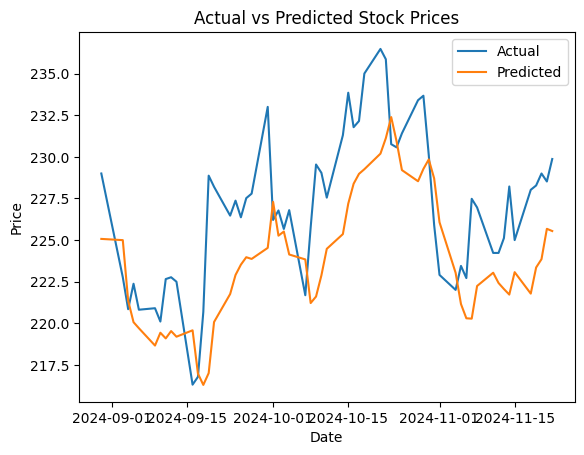

In [88]:
import matplotlib.pyplot as plt

# Create the plot
plt.plot(df.index[-60:], actual, label='Actual')  # Plot actual prices
plt.plot(df.index[-60:], predicted, label='Predicted')  # Plot predicted prices

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Actual vs Predicted Stock Prices')
plt.legend()

# Show the plot
plt.show()

## 6. Conclusion
Discuss the results and potential improvements.